Objectives : 
1. Obtain unbiased estimates of a model's performance
2. Diagnose the common problems of machine learning algorithms
3. Fine-tune machine learning models
4. Evaluate predictive models using different performance metrics

Streamlining workflows with pipelines :
Pipeline class in scikit is a handy tool which allows us to fit models with a arbitrary number of pre-processing steps to be applied on the data.

Breast cancer wisconsin dataset : 
The Breast Cancer Wisconsin dataset has been deposited in the UCI Machine Learning Repository,

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                               'machine-learning-databases'
                               '/breast-cancer-wisconsin/wdbc.data',
                               header=None)

In [3]:
#Data exploration
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Having a look at the data, it seems the first column contains ID, second column contains the label, whether the tumour is malignant or benign. the next 30 columns contain the features.

In [4]:
len(df.columns)

32

In [5]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:,2:].values
y = df.loc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

the label encoder object encodes the categorical type variable into numerical class - 0 and 1.

In [6]:
le.transform(['M','B'])

array([1, 0])

In [7]:
# Train test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)

Combining transformers and estimators into a single pipeline : 
In the earlier notebooks, feature scaling was done on the dataset using StandardScaler class and then in some cases, we may have to do PCA to reduce the dimensionality of the dataset using PCA. These operations can be clubbed together in a pipeline, we need not apply fit, transform separately. 

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression(random_state=1))])

In [9]:
y_pred = pipe_lr.predict(X_test)

In [10]:
print("Test accuracy : {score}".format(score=pipe_lr.score(X_test,y_test)))

Test accuracy : 0.956140350877193


The make_pipeline function takes an arbitrary number of scikit-learn transformers (objects that support the fit and transform methods as input), followed by a scikit-learn estimator that implements the fit and predict methods. \
We can think of a scikit-learn Pipeline as a meta-estimator or wrapper around those individual transformers and estimators. \
There is no limit to the number of intermediate steps/transformers which can be put in a pipeline, the only condition is that the last one should be a estimator.

Similar to calling fit on a pipeline, pipelines also implement a predict method. If we feed a dataset to the predict call of a Pipeline object instance, the data will pass through the intermediate steps via transform calls. in the final step, the estimator object will then return a prediction on the transformed data.

Using k-fold cross-validation to assess model performance : 
IF model is too simple -> high bias -> underfitting \
if model is very complex -> high variance -> overfitting \
To find the right hyperparameters, regularization etc, we need to test our model on a holdout dataset after training before testing finally on unseen test data and deploying. \
Common cross validation techniques involve holdout cross validation techniques, k-fold cross validation. 

Holdout method : \
Usually in machine learning algorithms, we have a training dataset and test dataset. But to get the right model hyperparameters and get the right model (called model selection). \
If we use the test set to determine the hyperparameters, we will indirectly end up overfitting on the test set, that is we will find hyperparameter which precisely work well with the given test set and not work generally well on new data. hence, we need another set of data on which we can conduct our hyperparameter tuning performances. 

In holdout method , separate the data into three parts : training data, validation data and test data. \
The training set is used to train the different models and the validation set is used for model selection. \
this way, we have a test set which the model has never seen and we are more likely to get a less biased estimate with this approach. \
A disadvantage of the holdout method is that the performance estimate may
be very sensitive to how we partition the training set into the training and
validation subsets; the estimate will vary for different samples of the data. 

K-fold cross validation technique: \
In k-fold cross validation, we split the training data into k folds. k-1 folds are used for training and the remaining fold is used for validation. This procedure is repeated k times and we get k estimates. \
We then calculate the average performance of the models based on the different, independent folds to obtain a performance estimate that is less sensitive to the sub-partitioning of the training data compared to the holdout method.

Once we have found satisfactory hyperparameter values, we can retrain the model on the full training dataset. The reason for training on the full training dataset after k-fold cross-validation is that providing more training samples to a learning algorithm usually results in a more accurate and robust model.

once we the estimates from the k-fold cross validation, we compute the final estimate as average of all the estimates. a good number for k based on empirical evidences is 10. we split the dataset into 10 folds and use the 10 estimates obtained to compute the final estimate.

However, if we are working with relatively small training sets, it can be useful
to increase the number of folds. If we increase the value of k, more training data
will be used in each iteration, which results in a lower bias towards estimating the generalization performance by averaging the individual model estimates. \
However, large values of k will also increase the runtime of the cross-validation algorithm and yield estimates with higher variance, since the training folds will be more similar to each other. \
On the other hand, if we are working with large datasets, we can choose a smaller value for k, for example, k=5 , and still obtain an accurate estimate of the average performance of the model while reducing the computational cost of refitting and evaluating the model on the different folds.

A special case of k-fold cross validation : Leave one out validation,where number of folds = n [training dataset size]. so, one only sample is set aside as validation data. works well for very small datasets.

A slight improvement over k-fold cross validation is Stratified k-fold cross validation. It yields better bias and variance estimates, especially when there are classes of unequal proportions. In stratified split, the class proportions are preserved in each of the folds similar to the proportion observed in training data.


In [11]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [17]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
scores = []

for k, (train,test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print("Fold : {fold}, class distribution : {dist}, accuracy : {acc}".format(fold=k+1,dist=np.bincount(y_train[train]), acc=score))






Fold : 1, class distribution : [256 153], accuracy : 0.9347826086956522
Fold : 2, class distribution : [256 153], accuracy : 0.9347826086956522
Fold : 3, class distribution : [256 153], accuracy : 0.9565217391304348
Fold : 4, class distribution : [256 153], accuracy : 0.9565217391304348
Fold : 5, class distribution : [256 153], accuracy : 0.9347826086956522
Fold : 6, class distribution : [257 153], accuracy : 0.9555555555555556
Fold : 7, class distribution : [257 153], accuracy : 0.9777777777777777
Fold : 8, class distribution : [257 153], accuracy : 0.9333333333333333
Fold : 9, class distribution : [257 153], accuracy : 0.9555555555555556
Fold : 10, class distribution : [257 153], accuracy : 0.9555555555555556


In [18]:
print("CV accuracy = {mean} +/- {std}".format(mean=np.mean(scores), std=np.std(scores)))


CV accuracy = 0.9495169082125603 +/- 0.013854294239660376


sklearn also provides a Kfold cross validation class which can help get the job done.

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = pipe_lr, X = X_train, y=y_train,cv = 10, n_jobs = 1)
print(f"CV accuracy scores: {scores}".format(scores=scores) )

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]


In [20]:
print("CV accuracy = {mean} +/- {std}".format(mean=np.mean(scores), std=np.std(scores)))

CV accuracy = 0.9495169082125603 +/- 0.013854294239660376


we get the same results with this class also. if we observe, there is a parameter called n_jobs. This basically distributes the cross validation algorithm across cpus. if n_jobs = 1, one cpu is used. if n_jobs is set to n, n cpus are used for faster cross validation training and inference.

In [26]:
import time
start_time = time.time()
scores = cross_val_score(estimator = pipe_lr, X = X_train, y=y_train,cv = 10, n_jobs = 1)
print("time taken : ", time.time()-start_time)

time taken :  0.04999566078186035


In [27]:
import time
start_time = time.time()
scores = cross_val_score(estimator = pipe_lr, X = X_train, y=y_train,cv = 10, n_jobs = 2)
print("time taken : ", time.time()-start_time)

time taken :  0.06340312957763672


for this smaller dataset, multiple cpus actually reduces the performance. because there is an overhead for transfer of data to and from cache,which is actually causing overhead. For large datasets , we can see an increase in performance

Debugging algorithms with learning and validation curves :
Two powerful diagnostic tools - learning curve and validation curve -> helps find out whether training is happening properly [without issues of overfitting / underfitting]

sklearn has some useful functions which can be used to plot curves and help understand the problem and fix them like increase model complexity to solve underfitting, regularize , feature select or feature extract , collect more data [if possible] for solving overfitting.

In [28]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',random_state=1)) # with regularization and no PCA
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1) # training sizes : fraction of the training set used
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores, axis=1)


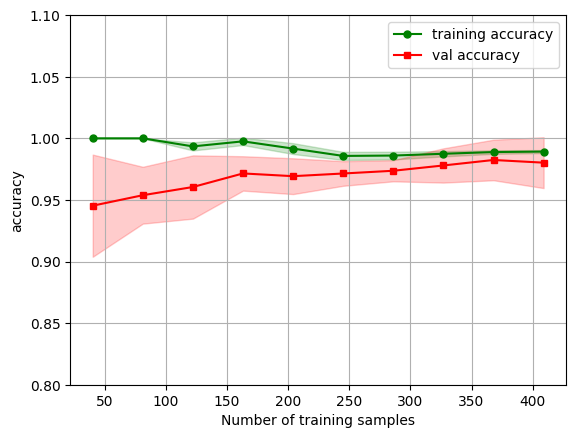

In [32]:
plt.plot(train_sizes , train_mean, color='green', marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean-train_std, train_mean+train_std,alpha=0.2, color='green')
plt.plot(train_sizes , test_mean, color='red', marker='s',markersize=5,label='val accuracy')
plt.fill_between(train_sizes,test_mean-test_std, test_mean+test_std,alpha=0.2, color='red')
plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.ylim([0.8,1.1])
plt.show()

from the above picture, our model does a good job in classification for the given dataset. for number of samples < 250, there is a gap between training and validation accuracy indicating underfit. But once number of samples cross 250, we see that val accuracy is catching up with training accuracy and they are at par with required accuracy -> which is good!